# 09: LIU Ramp-Up: 2021 Long Term Tracking: SC

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

### Figure parameters

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

### Function Declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Import Data

In [5]:
#Horizontal Scan No Space Charge

# Create dd dictionary
dd = dict()


dd = add_input_file(dd, '00/output/output.mat', '0 %')
dd = add_input_file(dd, '05/output/output.mat', '5 %')

	Added output data from  00/output/output.mat 	 dictionary key:  0 %
	Added output data from  05/output/output.mat 	 dictionary key:  5 %


### Plot Parameters

In [6]:
save_folder = 'Plots/'

sc = 'SbS'
legend_label = r'$\frac{\Delta \beta}{\beta_0}$' # r'$\frac{\delta p}{p_0}$'
main_label = 'PS_LIU_2021'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 5000
zoom_turns = 50
betagamma = 3.13154090774 * 0.947643035549 # 2GeV
#betagamma = 2.492104532 * 0.9159915293879255 # 1.4GeV

In [7]:
dd

{'0 %': {'D_x': array([[3.12150209, 3.17291982, 3.24455494, ..., 3.18047039, 3.18236241,
          3.18879757]]),
  'D_y': array([[-1.05431815e-03, -1.76299936e-03, -1.29564606e-03, ...,
           1.15640428e-03, -1.00982000e-05, -6.00178339e-04]]),
  '__globals__': [],
  '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Feb  5 14:37:34 2020',
  '__version__': '1.0',
  'alpha_x': array([[0.03032158, 0.02585215, 0.02785205, ..., 0.02804358, 0.02871757,
          0.02589893]]),
  'alpha_y': array([[0.05401699, 0.0369676 , 0.07813084, ..., 0.05664149, 0.05482748,
          0.05946464]]),
  'beta_x': array([[22.50068783, 22.50528444, 22.5217319 , ..., 22.5571329 ,
          22.50285589, 22.48169155]]),
  'beta_y': array([[11.67419125, 12.16559431, 12.07976323, ..., 11.9582538 ,
          12.00715877, 11.98839919]]),
  'bunchlength': array([[1.87762702e-07, 1.87761604e-07, 1.87760428e-07, ...,
          1.85822627e-07, 1.85811565e-07, 1.85800614e-07]]),
  'cumulative_time

In [8]:
dd['0 %'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

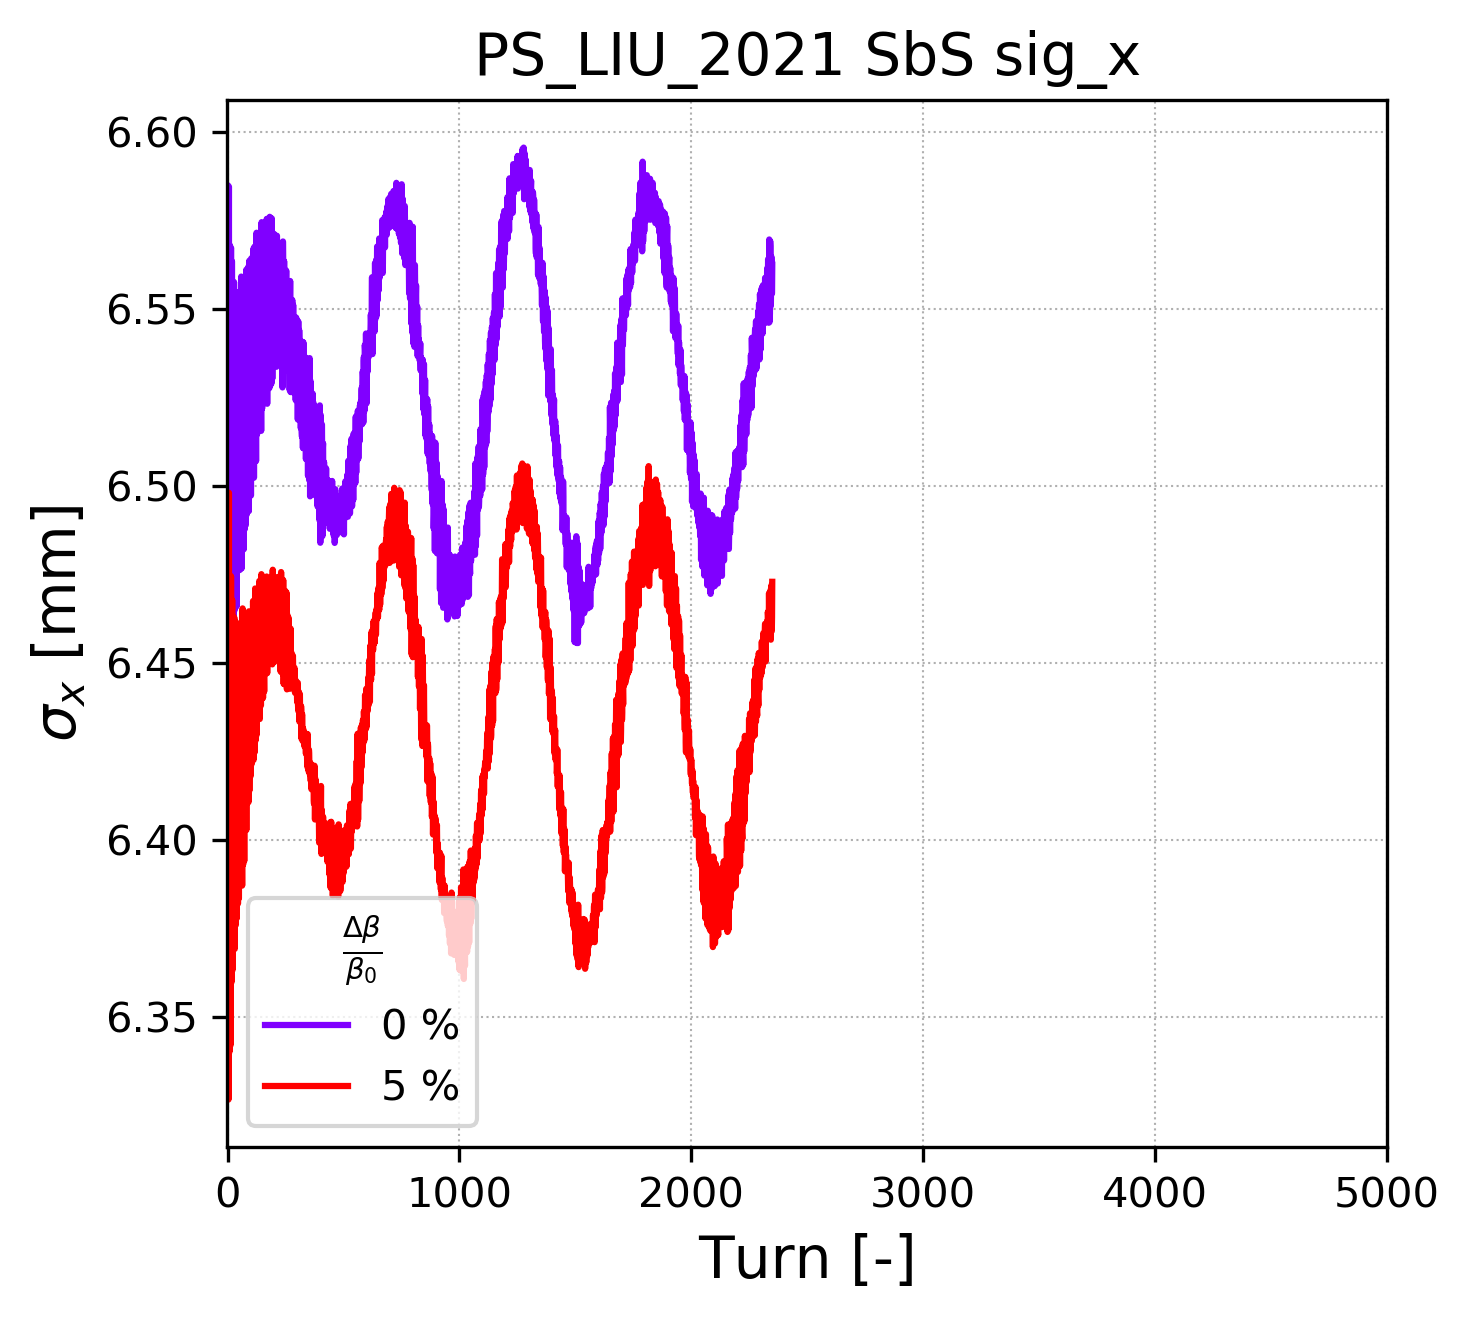

In [9]:
parameter = 'sig_x'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

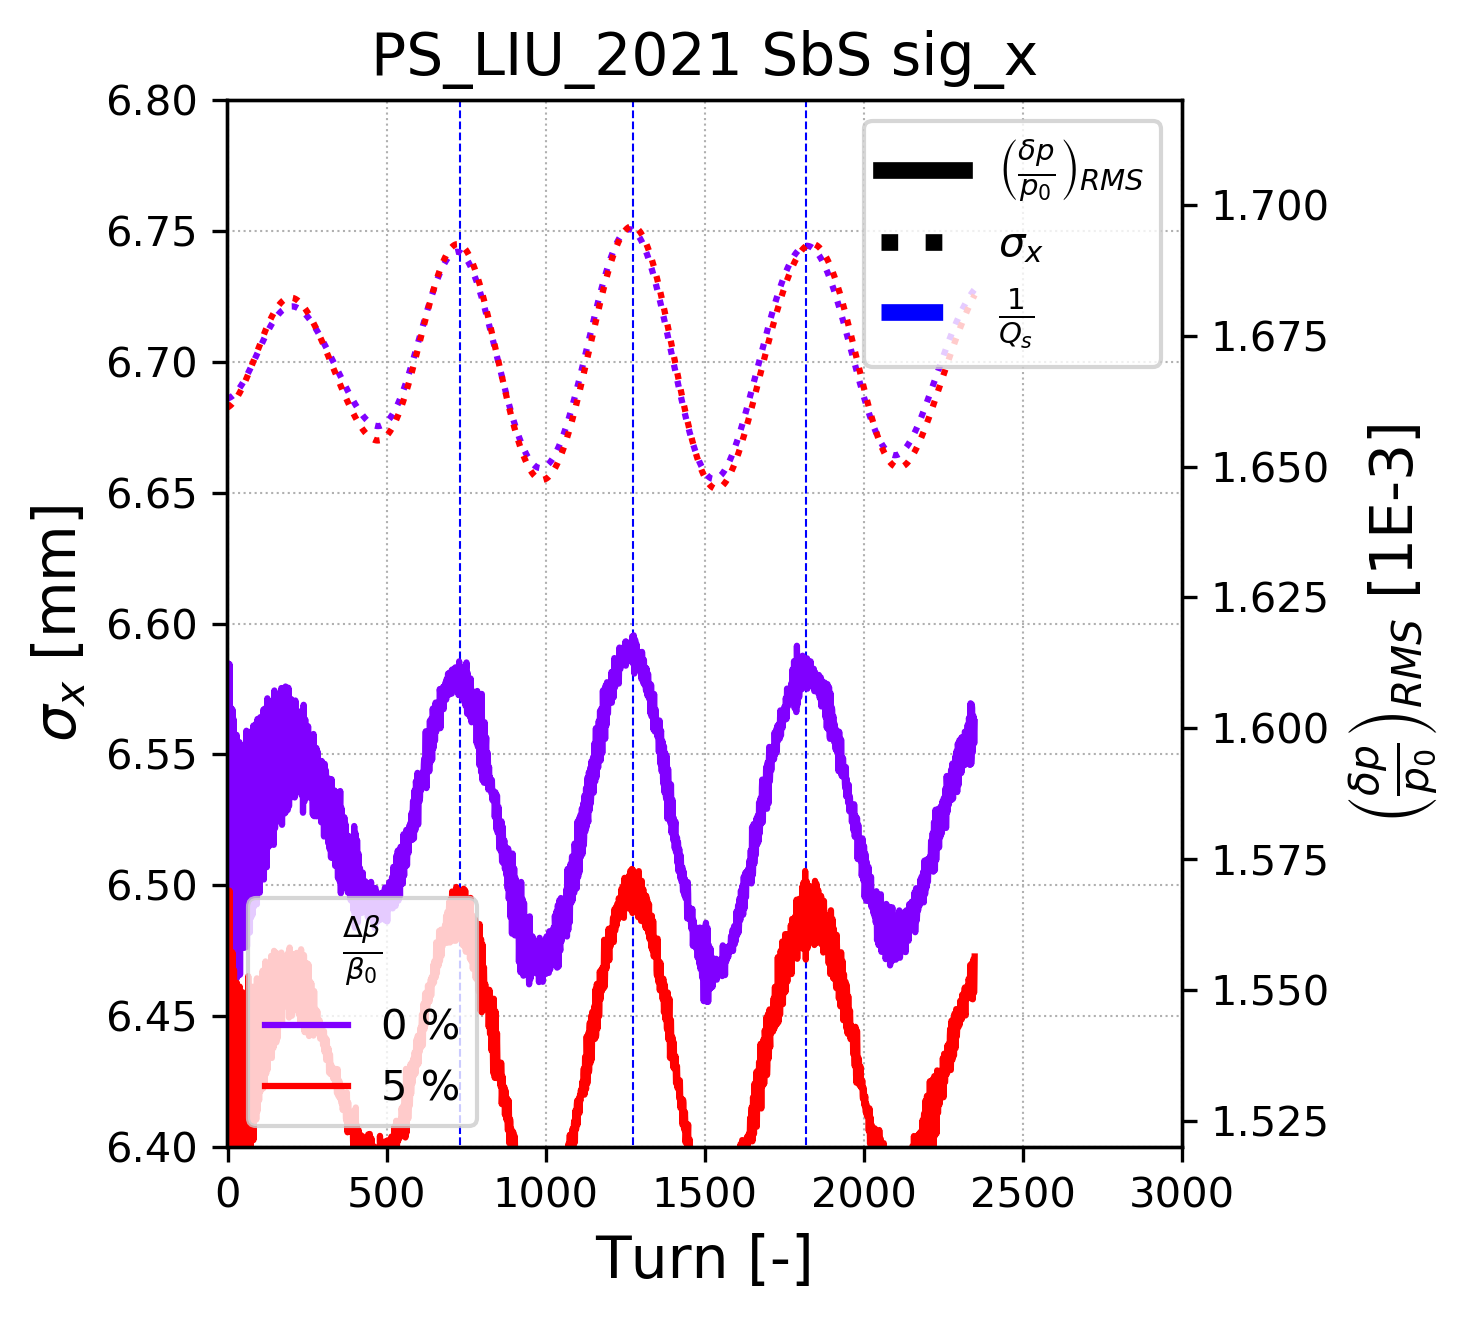

In [10]:
parameter = 'sig_x'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax2.set_ylabel(r'$\left(\frac{\delta p}{p_0}\right)_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it], ls='-');
    ax2.plot(dd[key]['turn'][0], dd[key]['dpp_rms'][0]*multi, color=colors[c_it], ls=':');
    c_it = c_it + 1;
    

        
ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-1,3000)
ax2.set_ylim(1.52, 1.72)
ax1.set_ylim(6.4, 6.8)

custom_lines = [Line2D([0], [0], color='k', lw=4, linestyle='-'),
                Line2D([0], [0], color='k', lw=4, linestyle=':'),
                Line2D([0], [0], color='b', lw=4, linestyle='--')]

ax2.legend(custom_lines, [r'$\left(\frac{\delta p}{p_0}\right)_{RMS}$',r'$\sigma_x$', r'$\frac{1}{Q_s}$'], loc=1)

ax1.vlines(730, 6, 7, colors='b', linestyles='solid', label='', lw=0.5, linestyle='--')
ax1.vlines(730+545, 6, 7, colors='b', linestyles='solid', label='', lw=0.5, linestyle='--')
ax1.vlines(730+545+545, 6, 7, colors='b', linestyles='solid', label='', lw=0.5, linestyle='--')

fig1.tight_layout()

#savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

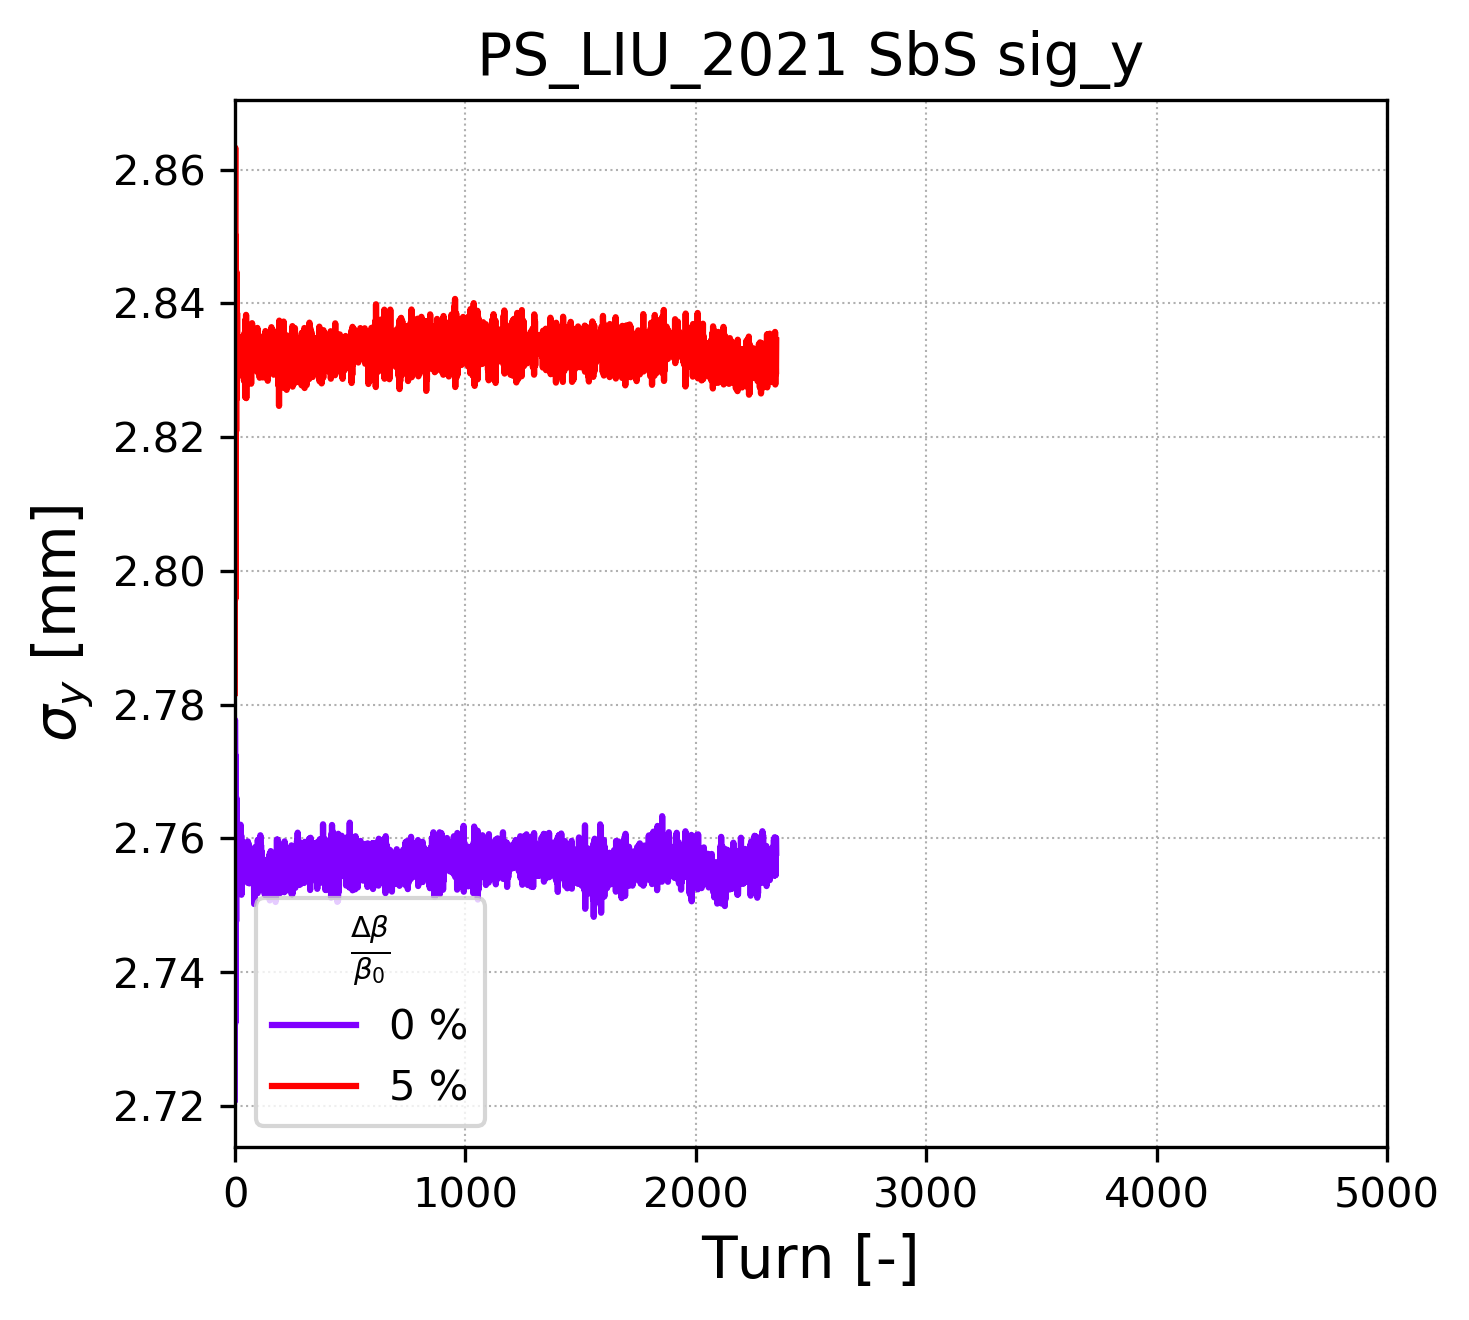

In [11]:
parameter = 'sig_y'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

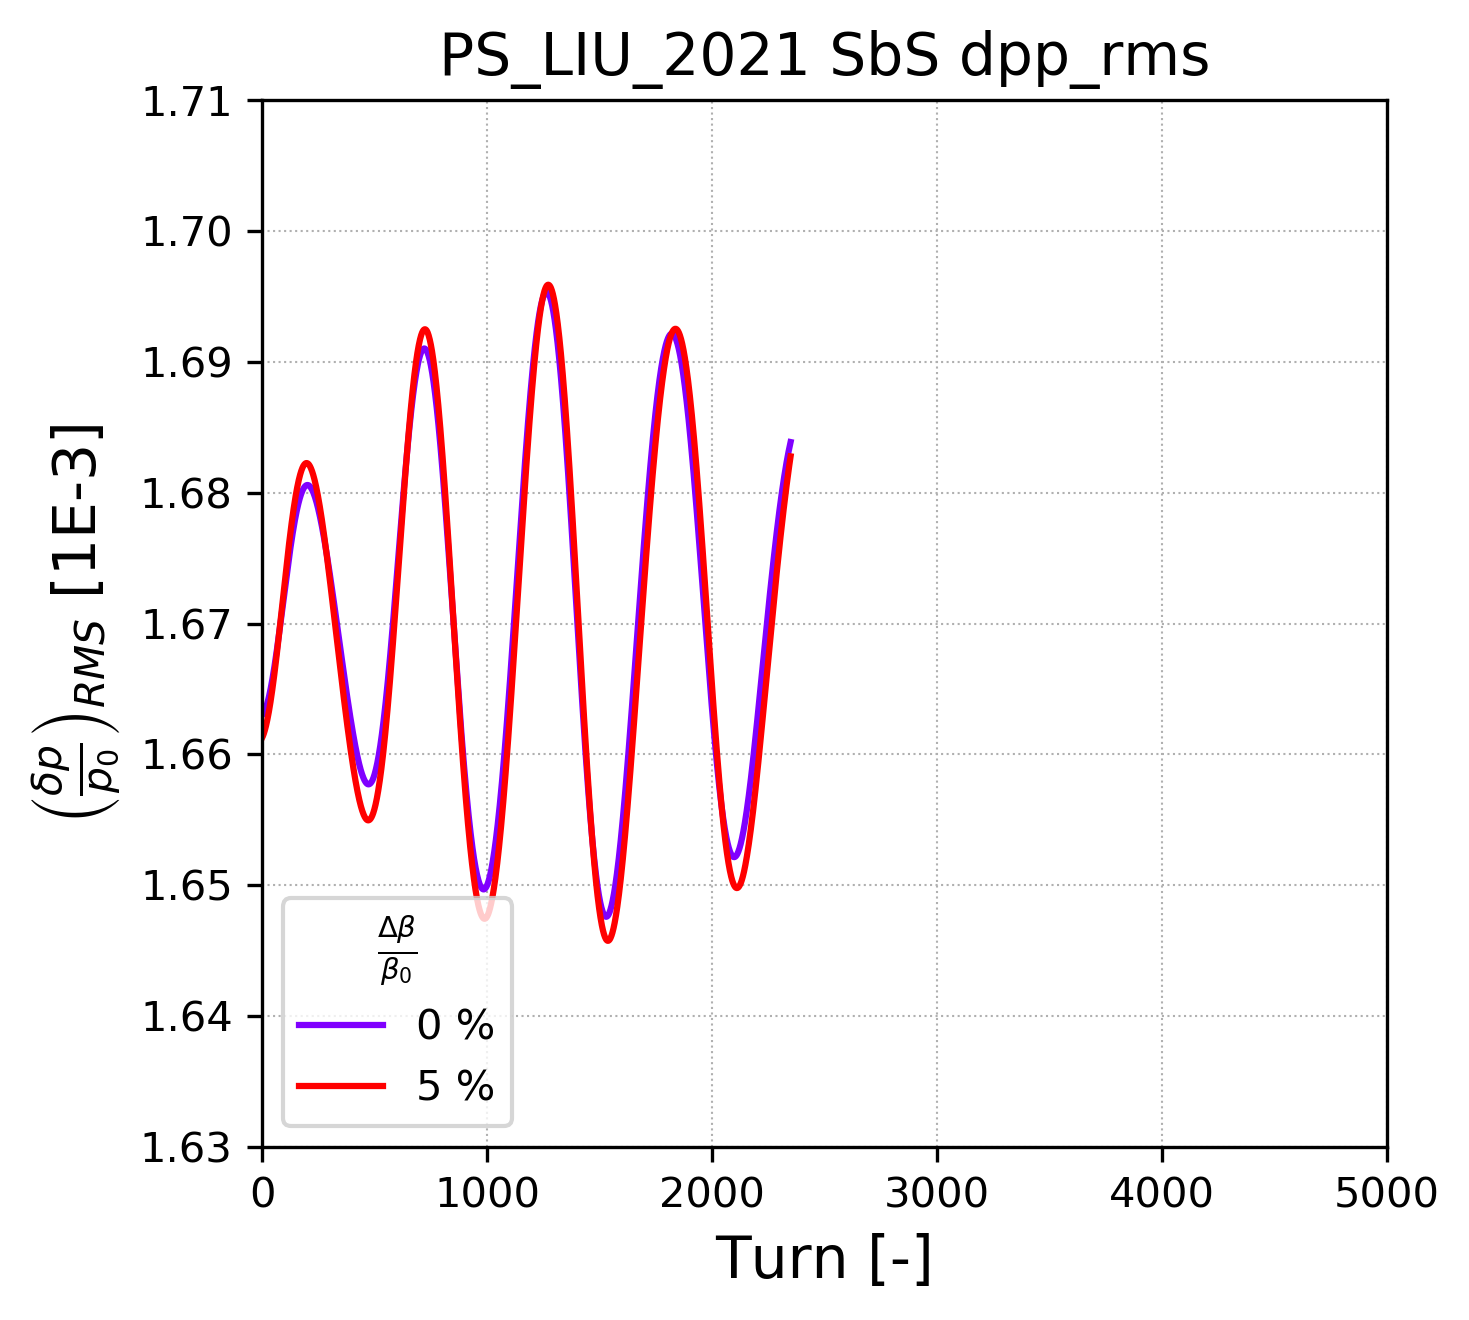

In [12]:
parameter = 'dpp_rms'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\left(\frac{\delta p}{p_0}\right)_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-1,turn_tot)

ax1.set_ylim(1.63, 1.71)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

Synchroton period looks like  541.0  turns


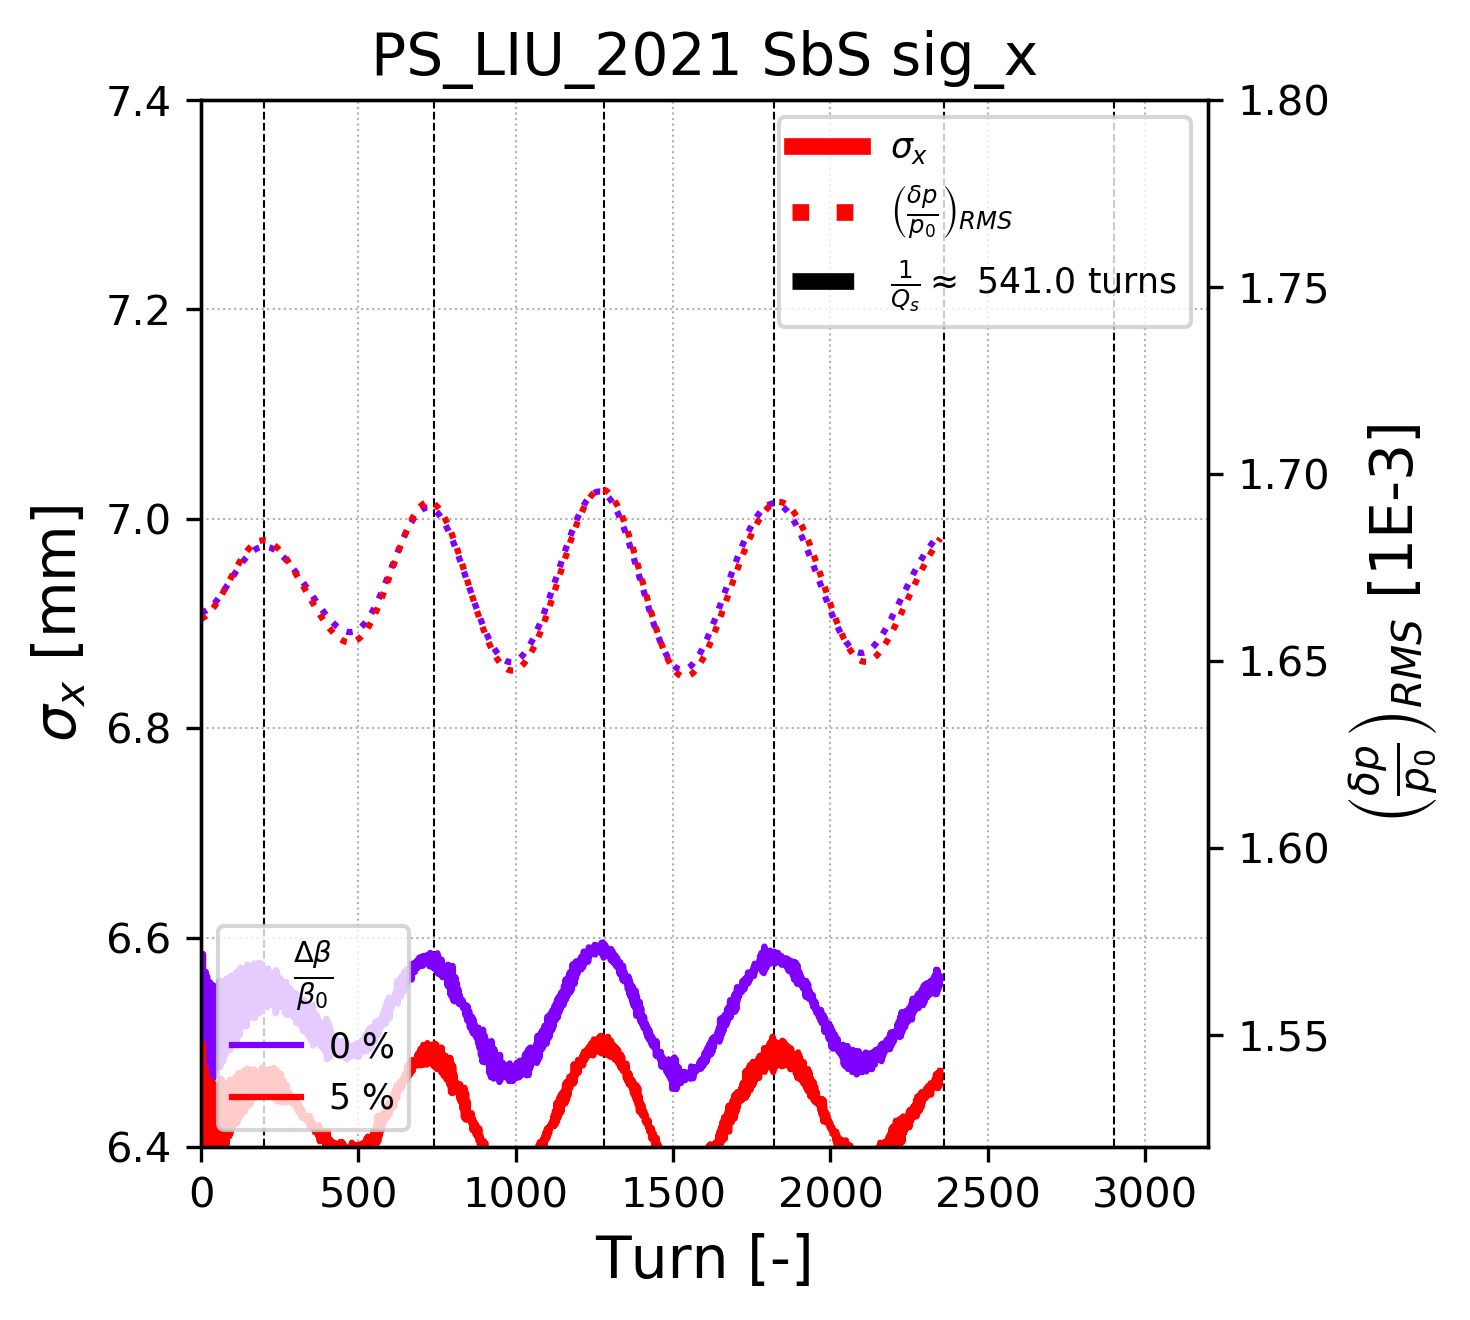

In [13]:
parameter = 'sig_x'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax2.set_ylabel(r'$\left(\frac{\delta p}{p_0}\right)_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it], ls='-');
    ax2.plot(dd[key]['turn'][0], dd[key]['dpp_rms'][0]*multi, color=colors[c_it], ls=':');
    c_it = c_it + 1;
    

        
ax1.legend(loc=3, title=legend_label, fontsize='small')
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-1,3200)
ax2.set_ylim(1.52, 1.8)
ax1.set_ylim(6.4, 7.4)

q_s = 1.85E-3
f_s = 1/q_s
peak_turn = 740
ax1.vlines(peak_turn-f_s, 6, 10, colors='k', linestyles='solid', label='', lw=0.5, linestyle='--')
ax1.vlines(peak_turn, 6, 10, colors='k', linestyles='solid', label='', lw=0.5, linestyle='--')
ax1.vlines(peak_turn+f_s, 6, 10, colors='k', linestyles='solid', label='', lw=0.5, linestyle='--')
ax1.vlines(peak_turn+f_s+f_s, 6, 10, colors='k', linestyles='solid', label='', lw=0.5, linestyle='--')
ax1.vlines(peak_turn+f_s+f_s+f_s, 6, 10, colors='k', linestyles='solid', label='', lw=0.5, linestyle='--')
ax1.vlines(peak_turn+f_s+f_s+f_s+f_s, 6, 10, colors='k', linestyles='solid', label='', lw=0.5, linestyle='--')

custom_lines = [Line2D([0], [0], color='r', lw=4, linestyle='-'),
                Line2D([0], [0], color='r', lw=4, linestyle=':'),
                Line2D([0], [0], color='k', lw=4, linestyle='--')]

lab3 = r'$\frac{1}{Q_s}\approx$ ' + str(round_sig(f_s,3)) + ' turns'
ax2.legend(custom_lines, [r'$\sigma_x$', r'$\left(\frac{\delta p}{p_0}\right)_{RMS}$',lab3], loc=1, fontsize='small')

fig1.tight_layout()

savename = save_folder + '/sig_x_synch_period.png'
plt.savefig(savename, dpi = 800);

print 'Synchroton period looks like ', round_sig(f_s,3), ' turns'

In [14]:
for key, value in sorted(dd.iteritems()):
    print '\n', key, ' bunch length deviation +/- ', round_sig((np.max(dd[key]['bunchlength'][0]*1E9) - np.min(dd[key]['bunchlength'][0]*1E9))/2,3), 'ns'


0 %  bunch length deviation +/-  2.6 ns

5 %  bunch length deviation +/-  2.76 ns


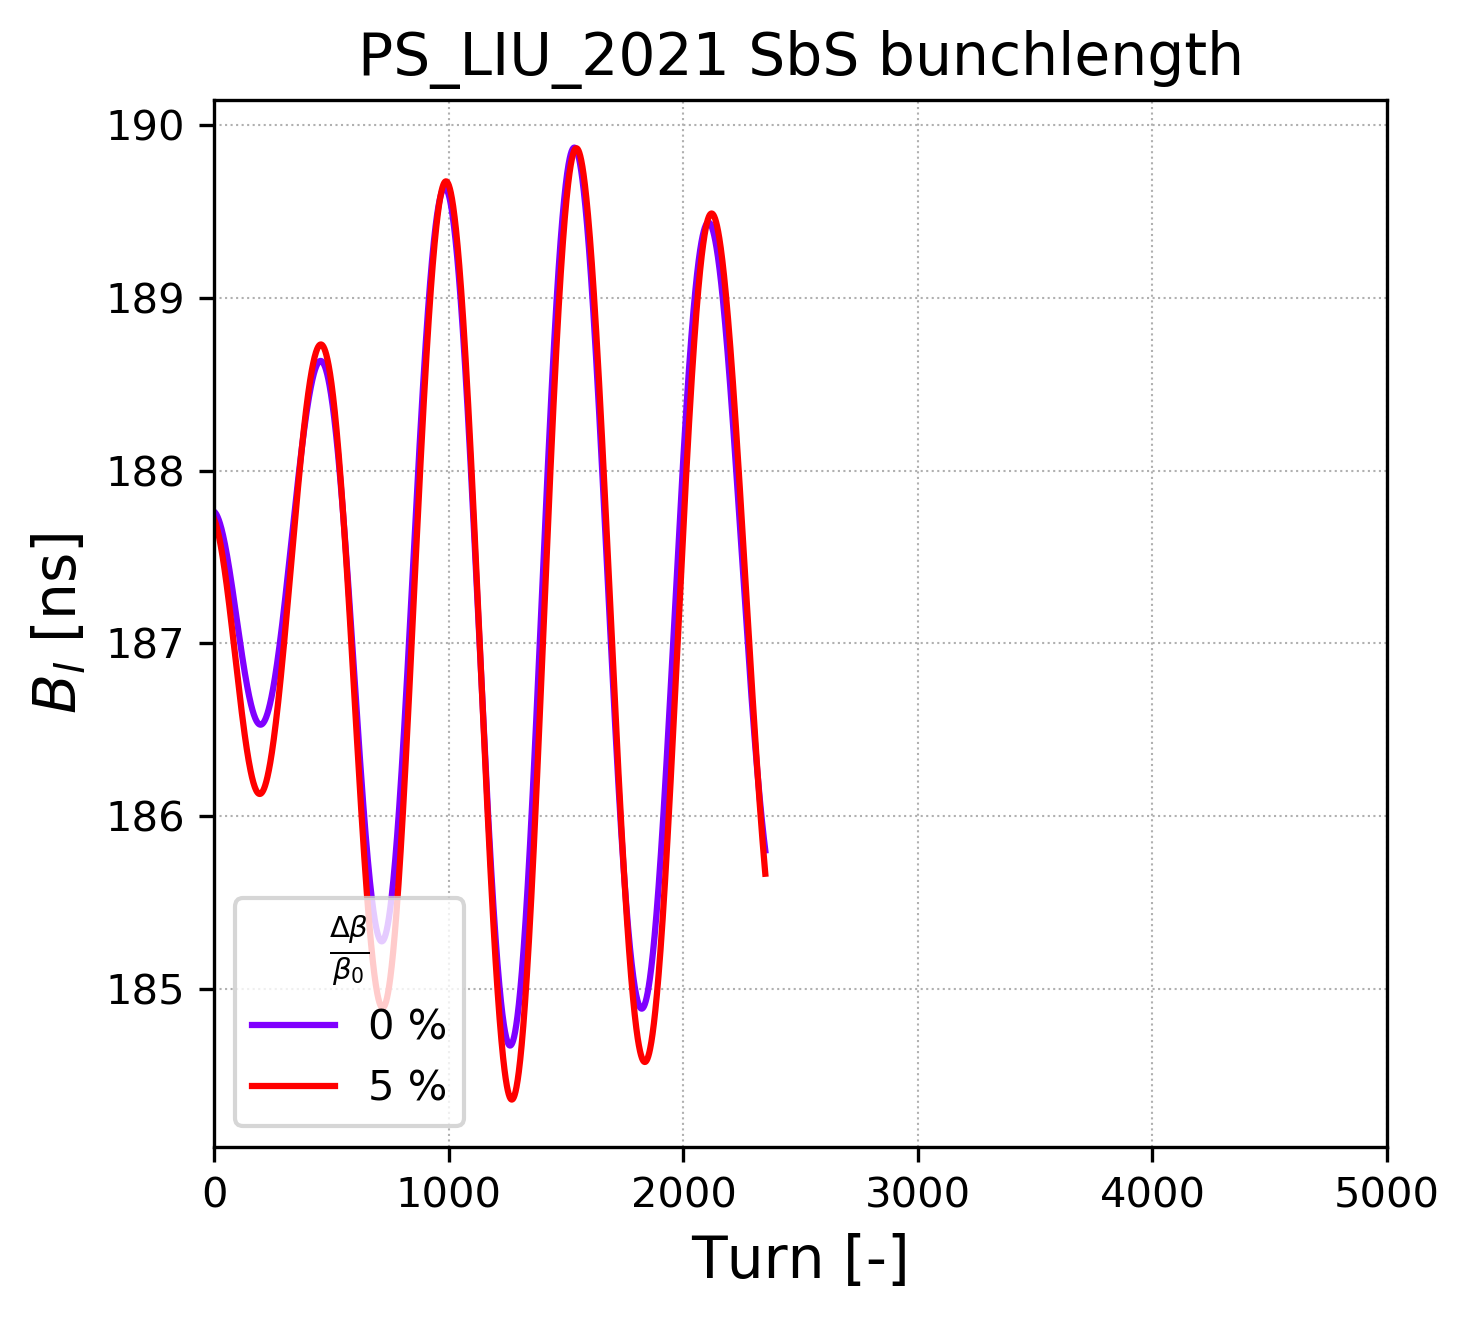

In [15]:
parameter = 'bunchlength'
multi = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

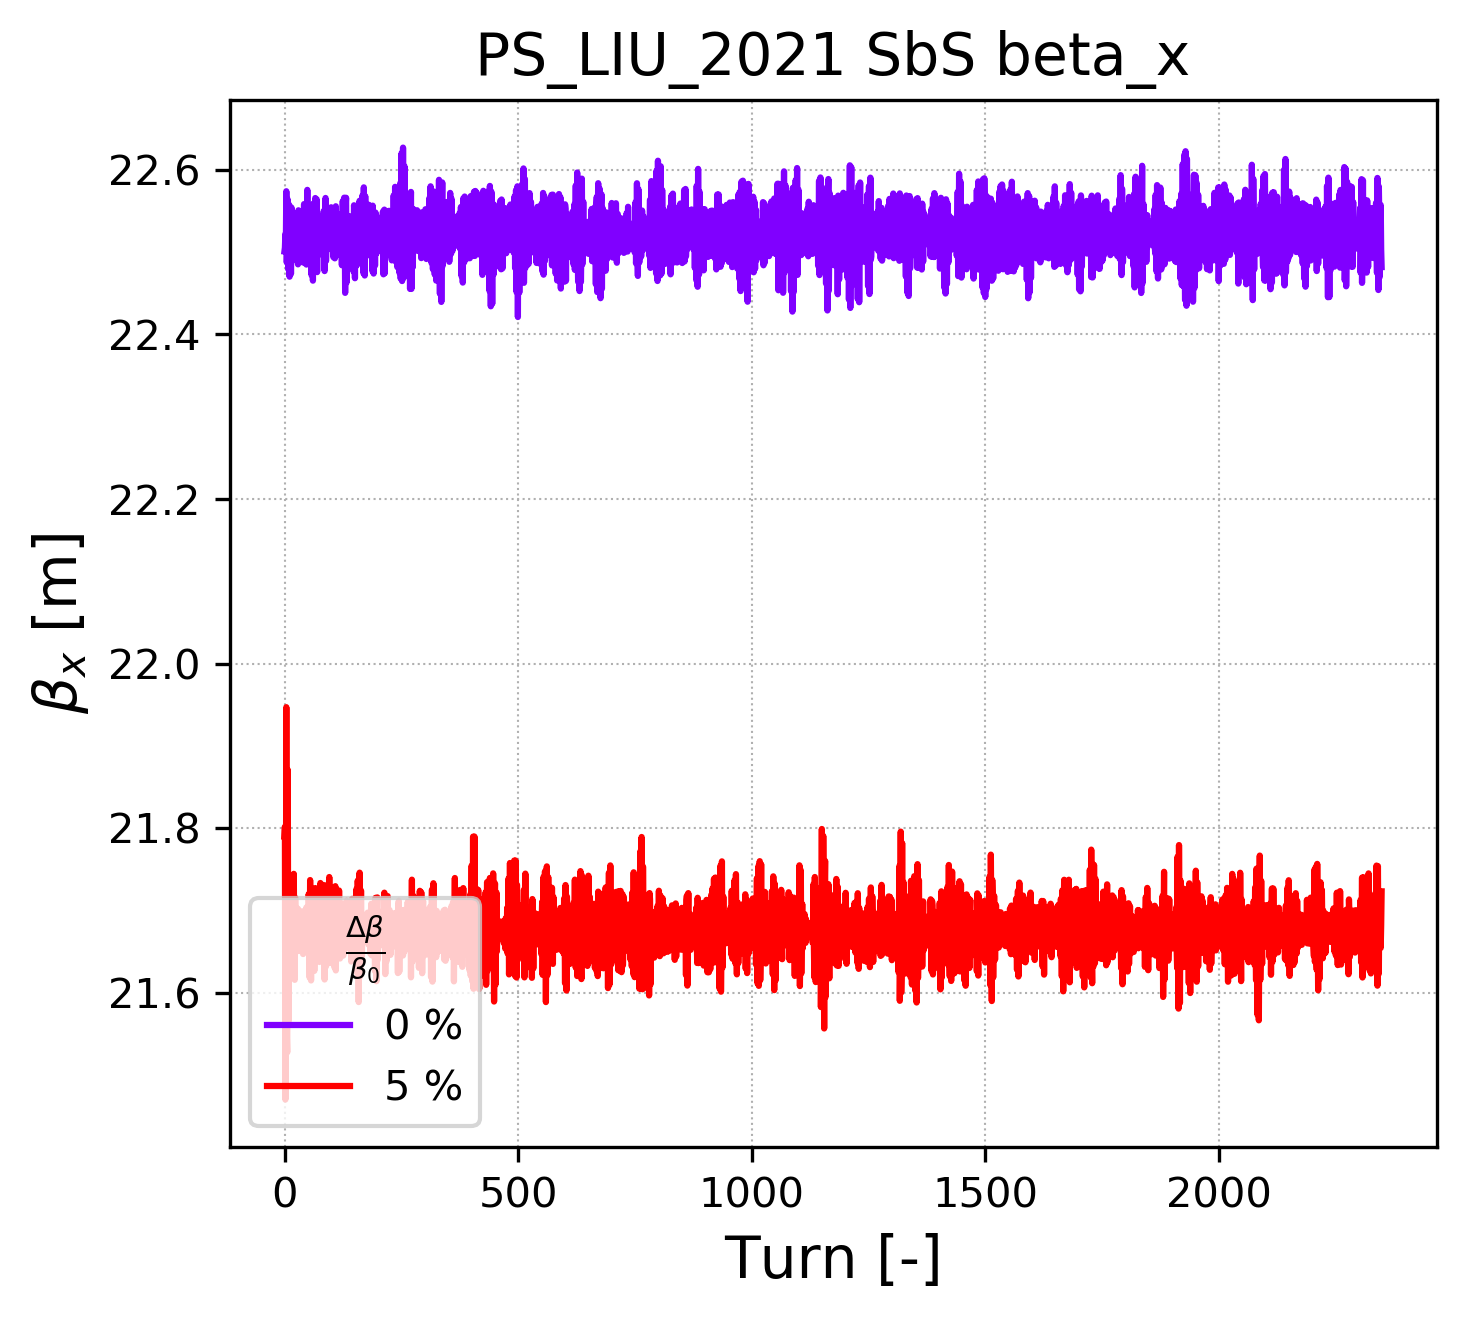

In [16]:
parameter = 'beta_x'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

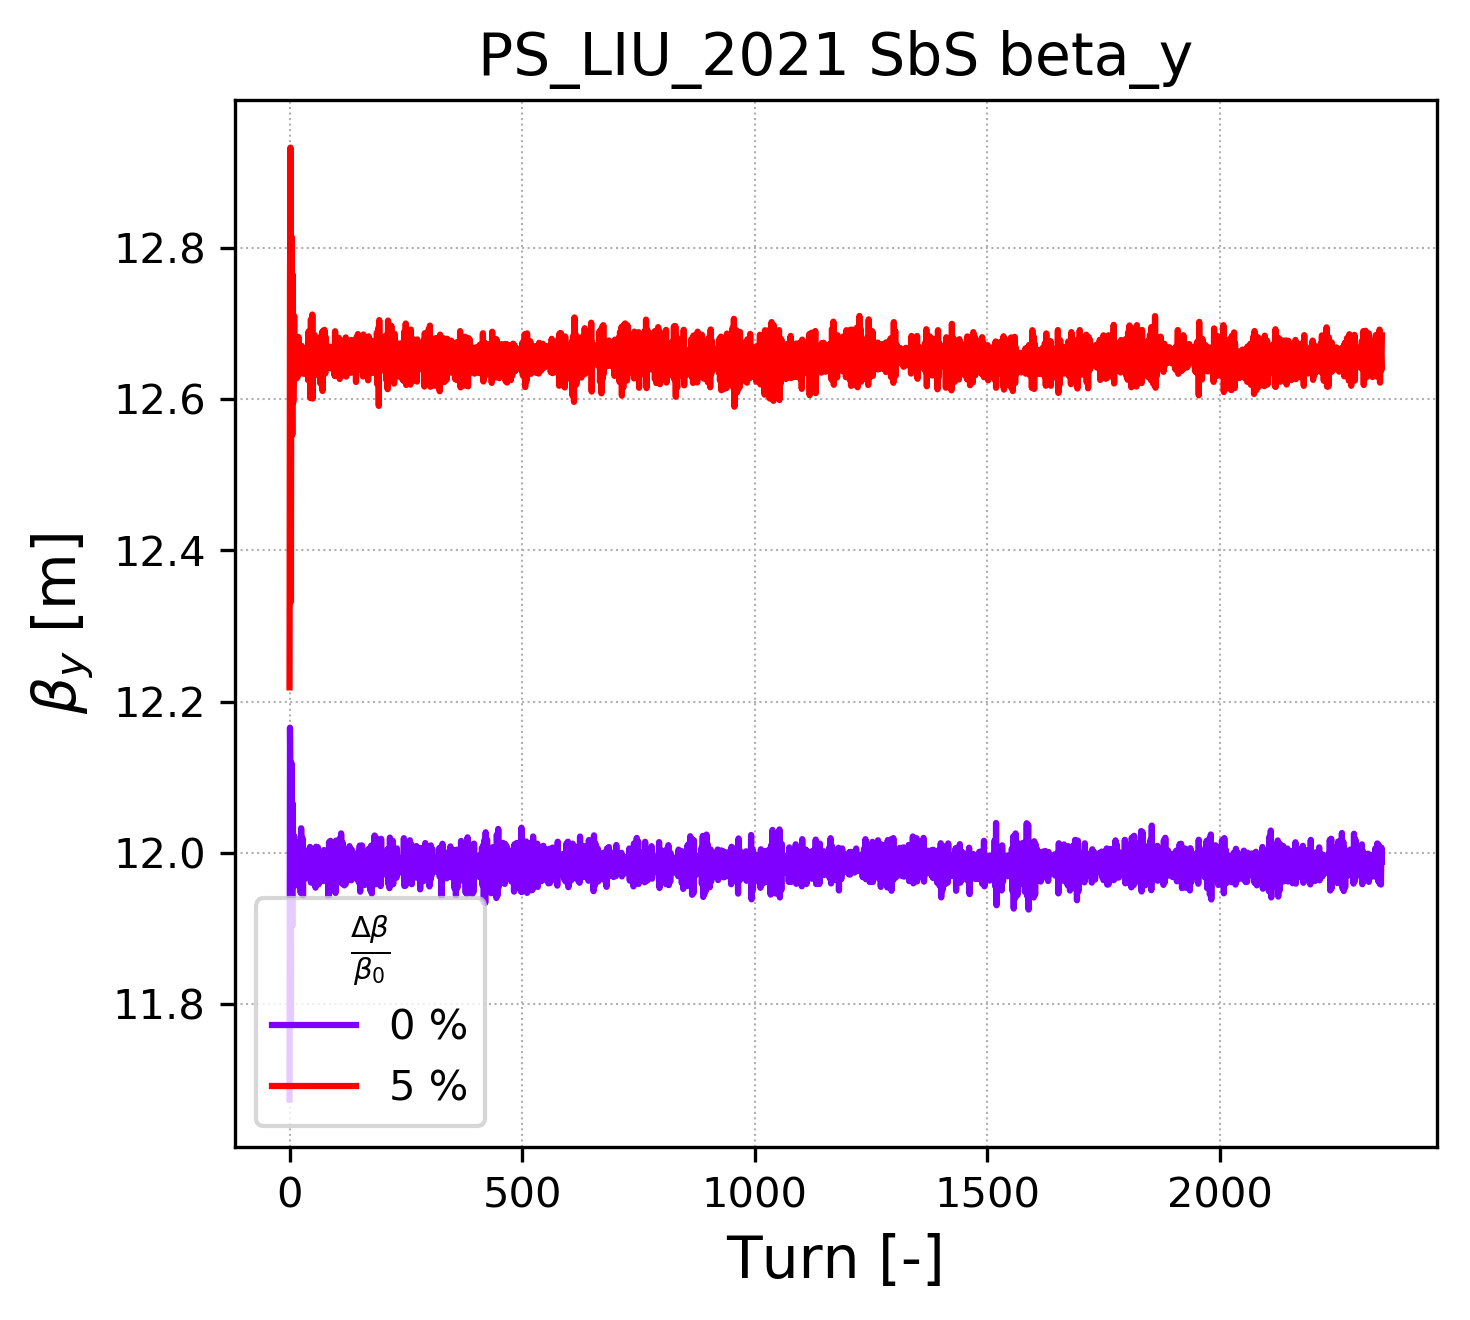

In [17]:
parameter = 'beta_y'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

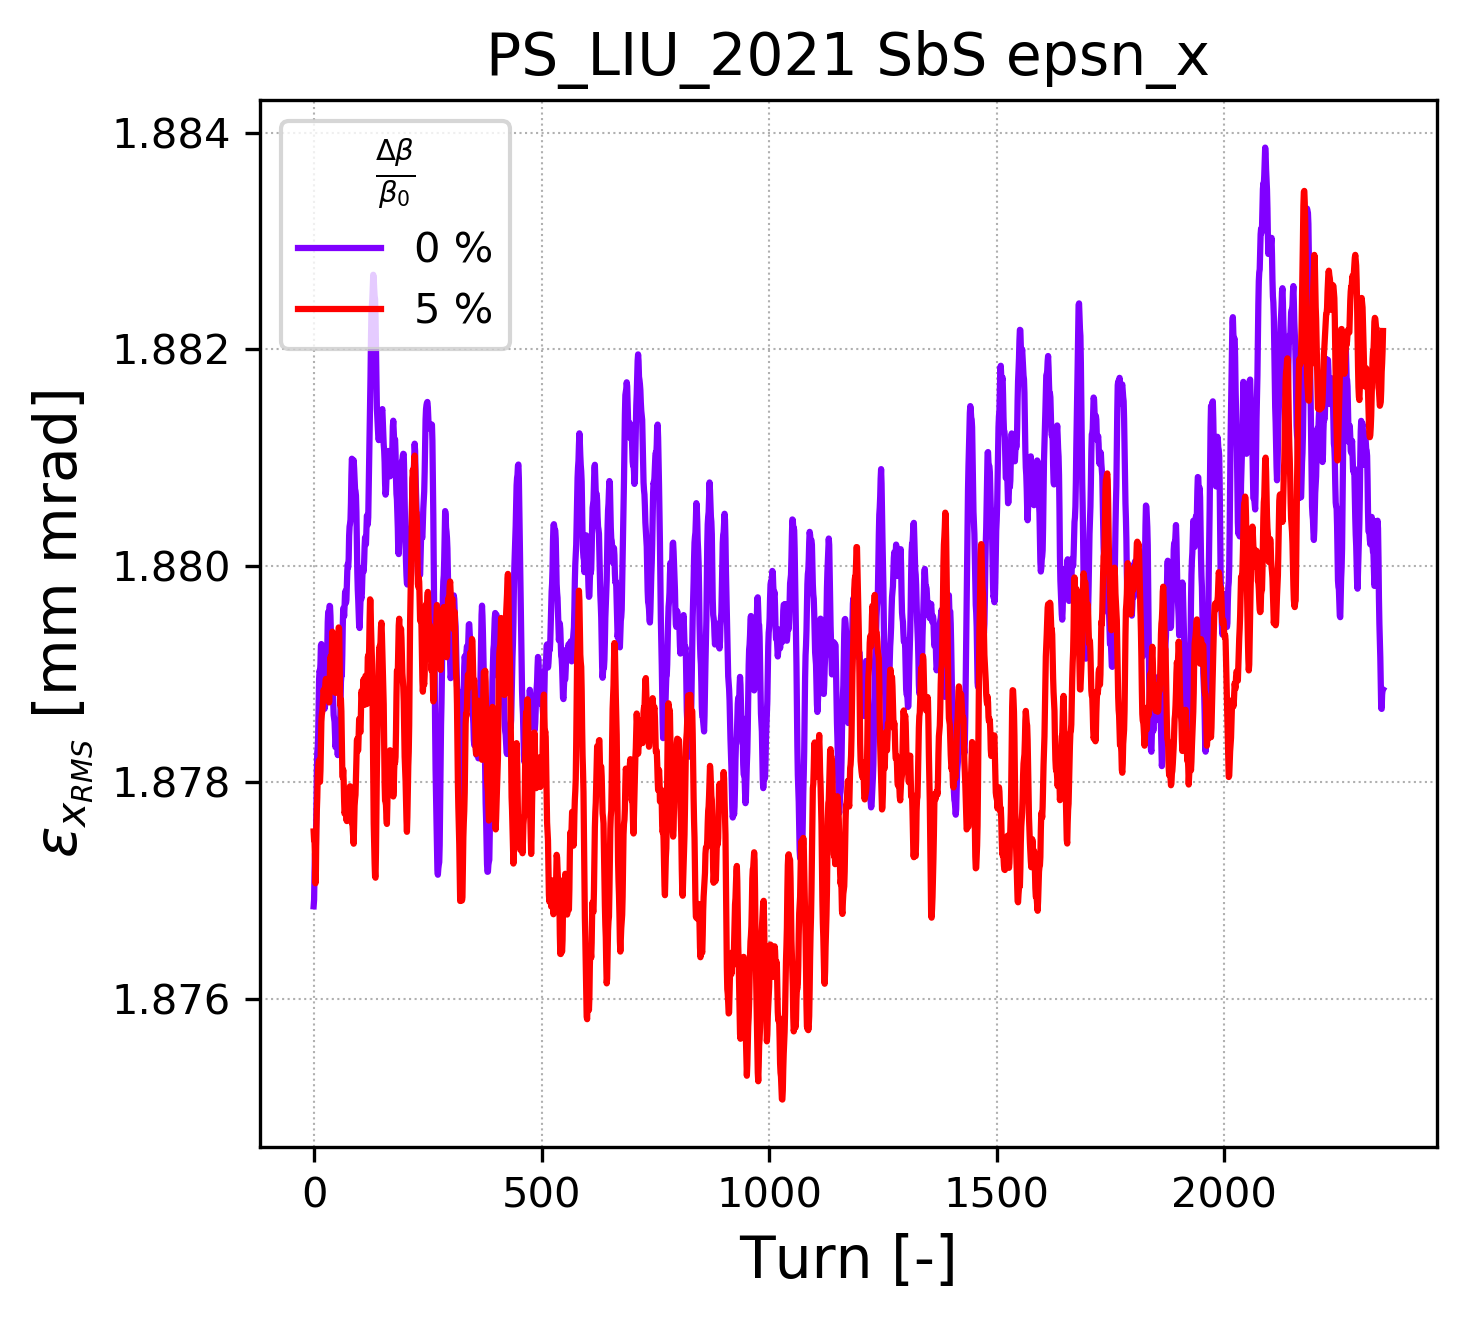

In [18]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{x_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=2, title=legend_label)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

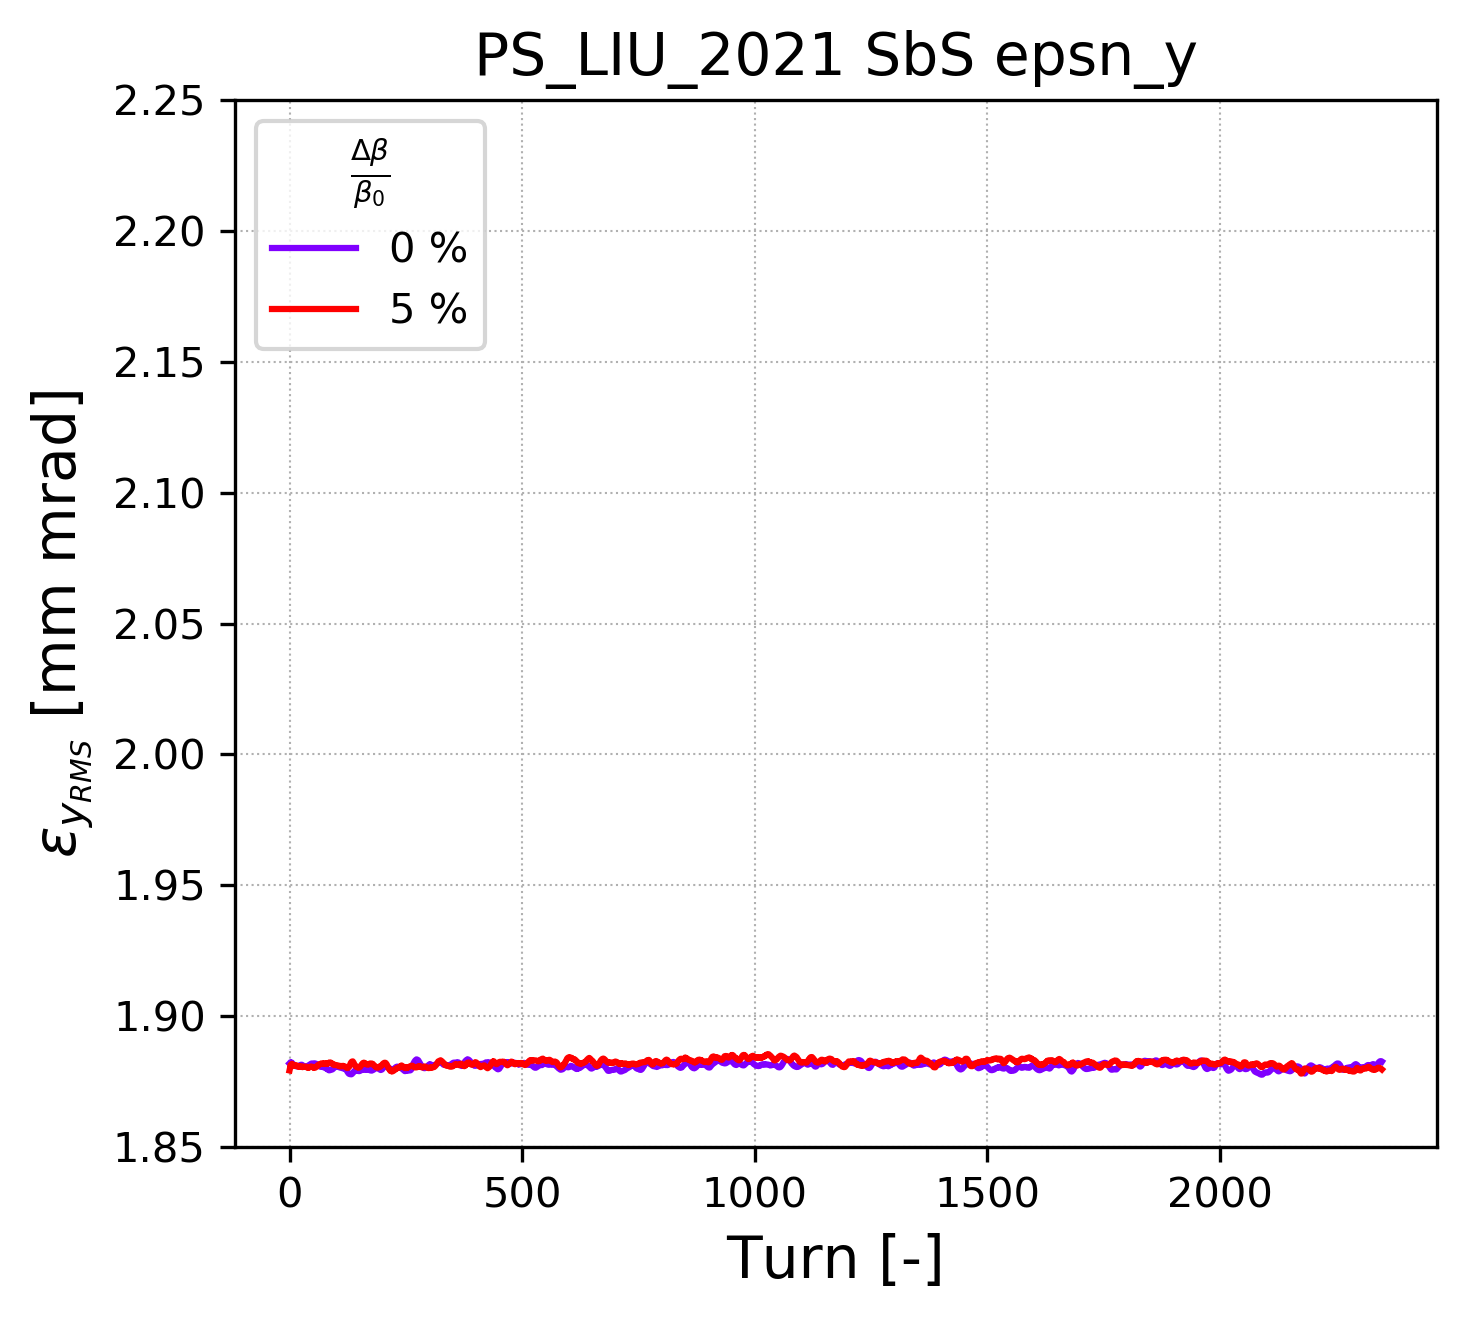

In [19]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{y_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=2, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_ylim(1.85, 2.25)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [20]:
print 'Vertical Emittance growth = ', round_sig(100*((1/(dd[41.2]['epsn_y'][0][0]/dd[41.2]['epsn_y'][0][-1]))-1),3), '%'

Vertical Emittance growth = 

KeyError: 41.2

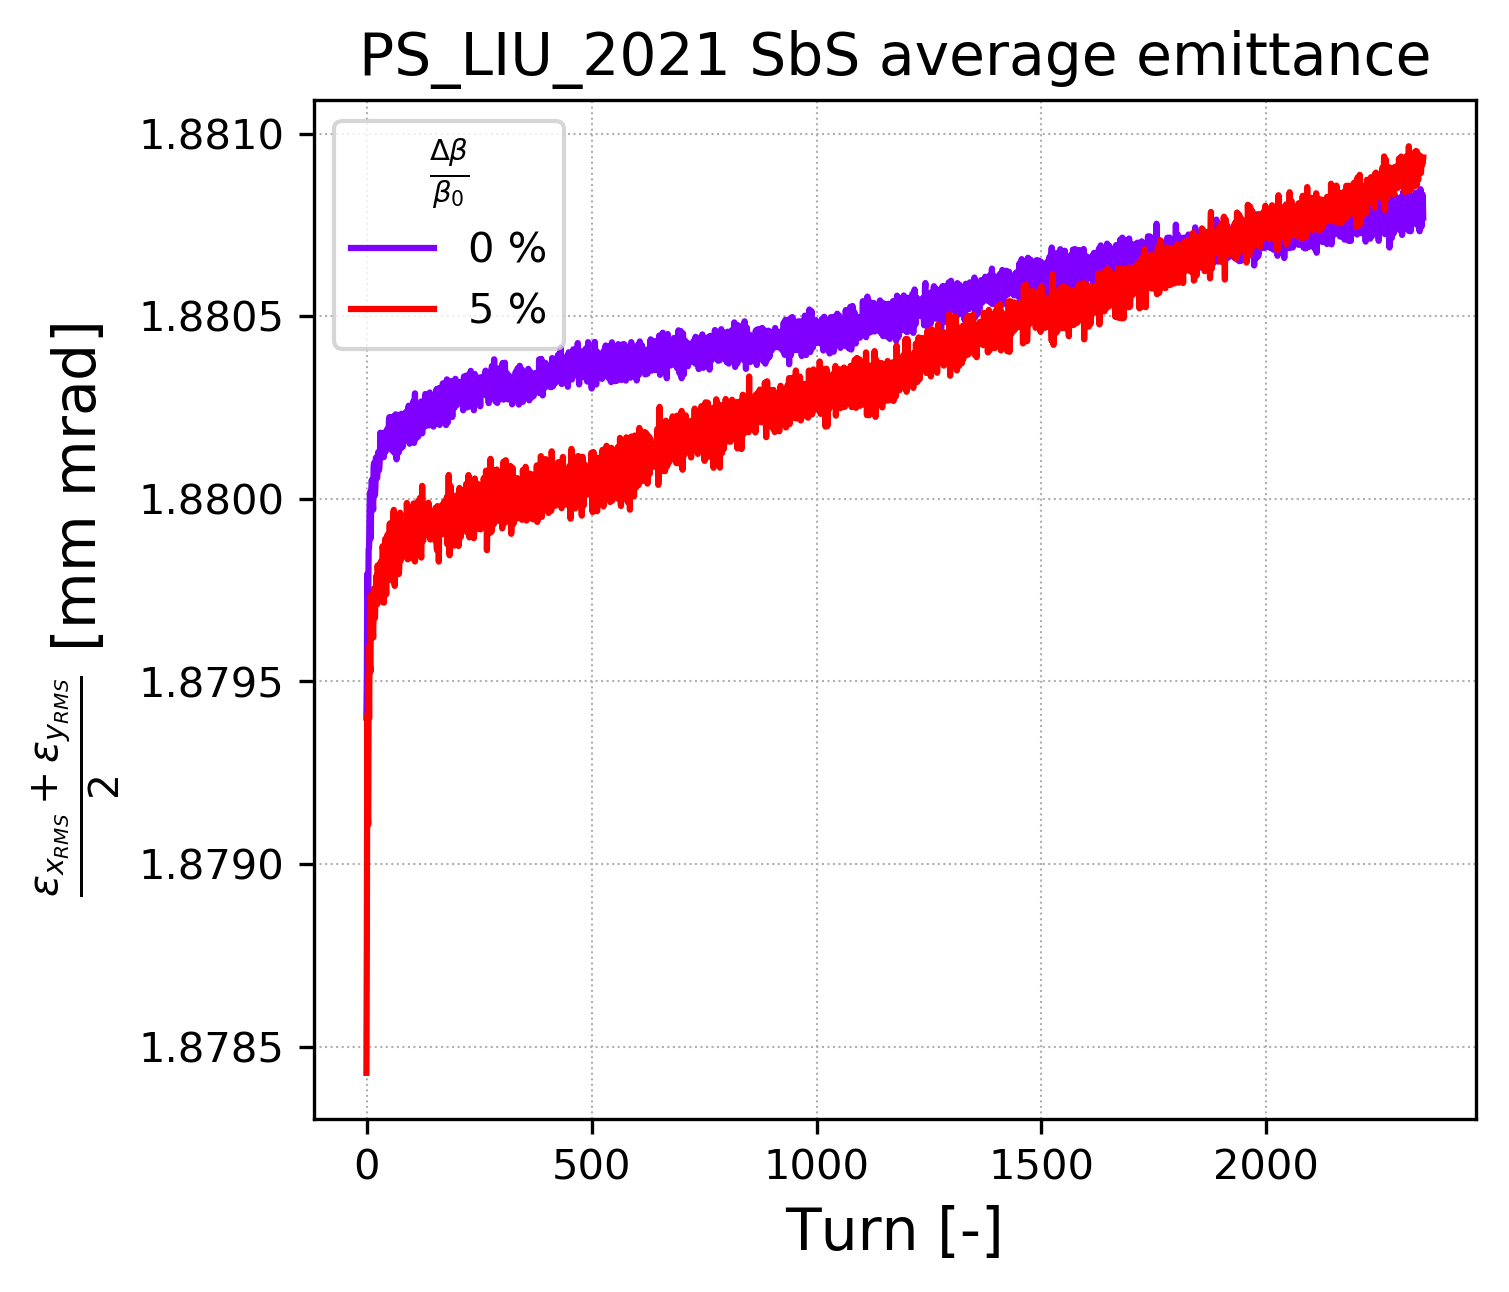

In [21]:
parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6
multi2 = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' average emittance'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_{x_{RMS}} + \epsilon_{y_{RMS}}}{2}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)


for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], (dd[key][parameter1][0]*multi1 + dd[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=2, title=legend_label);
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot);

savename = save_folder + '/'+ main_label + '_epsn_av.png'
plt.savefig(savename, dpi = 800);

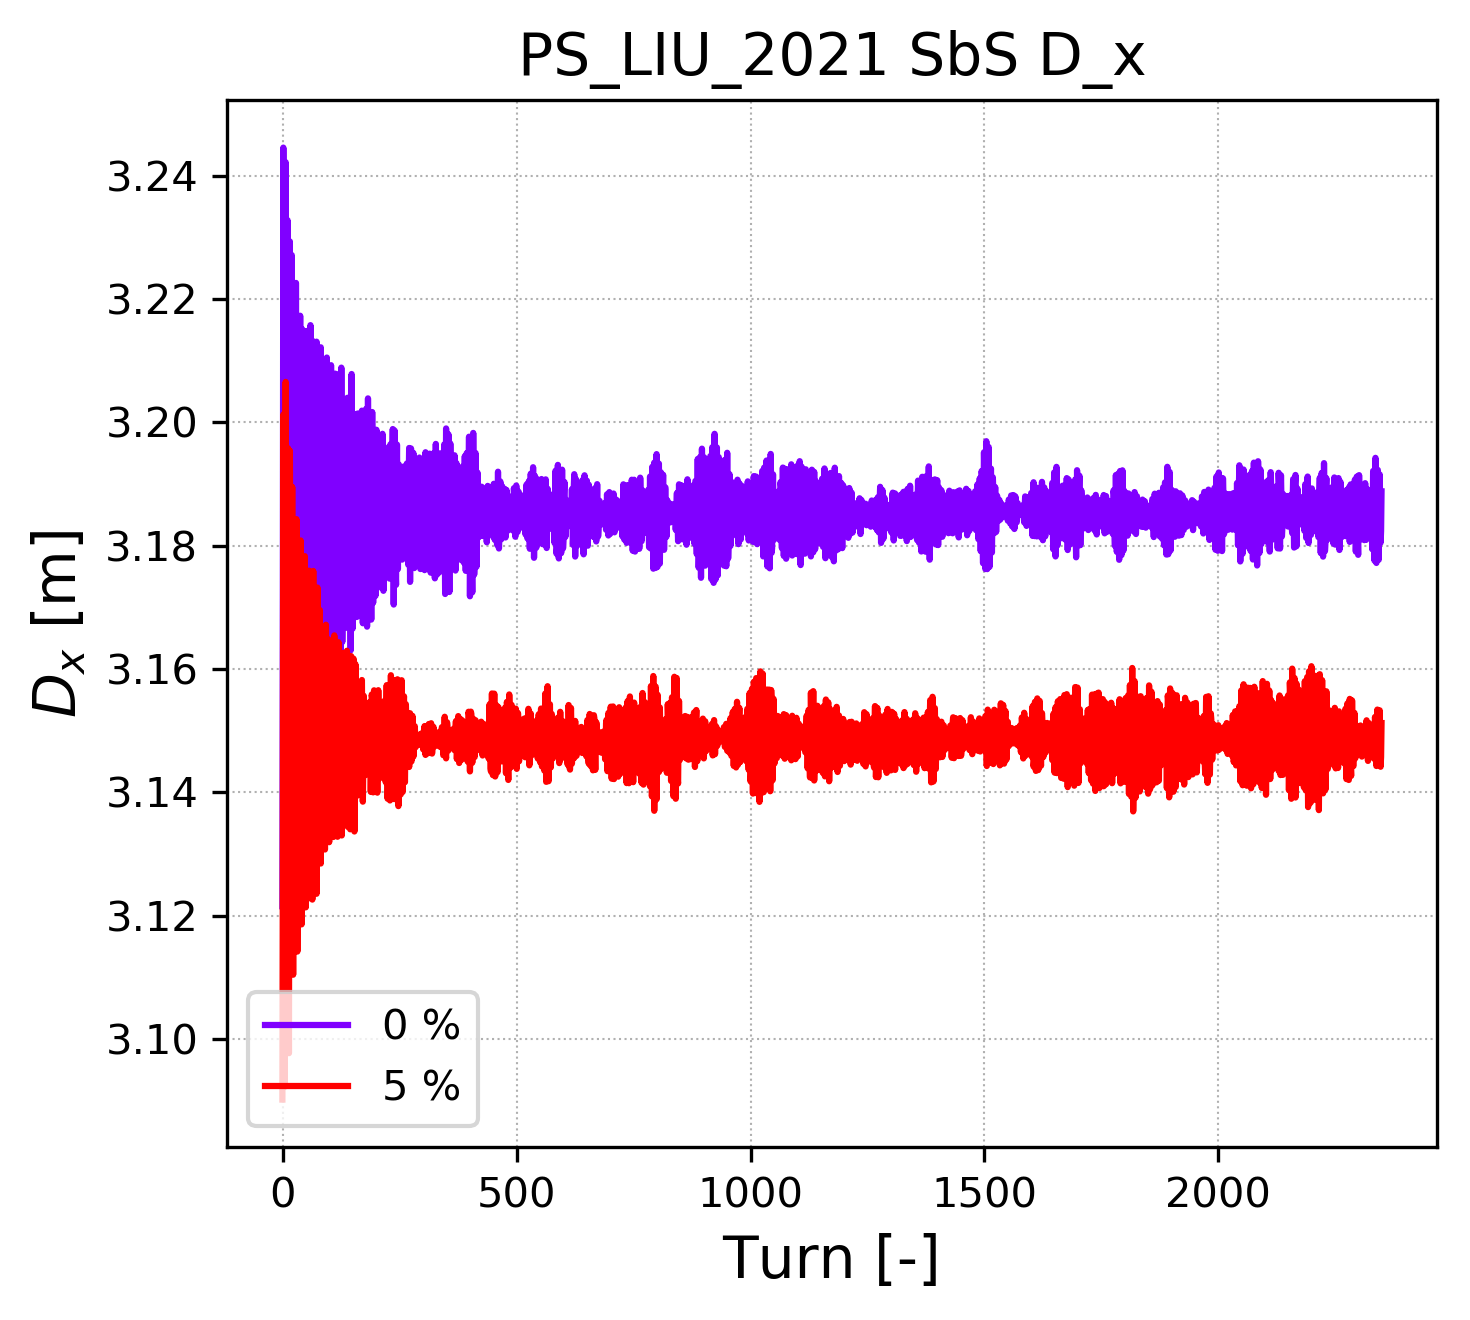

In [22]:
parameter = 'D_x'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

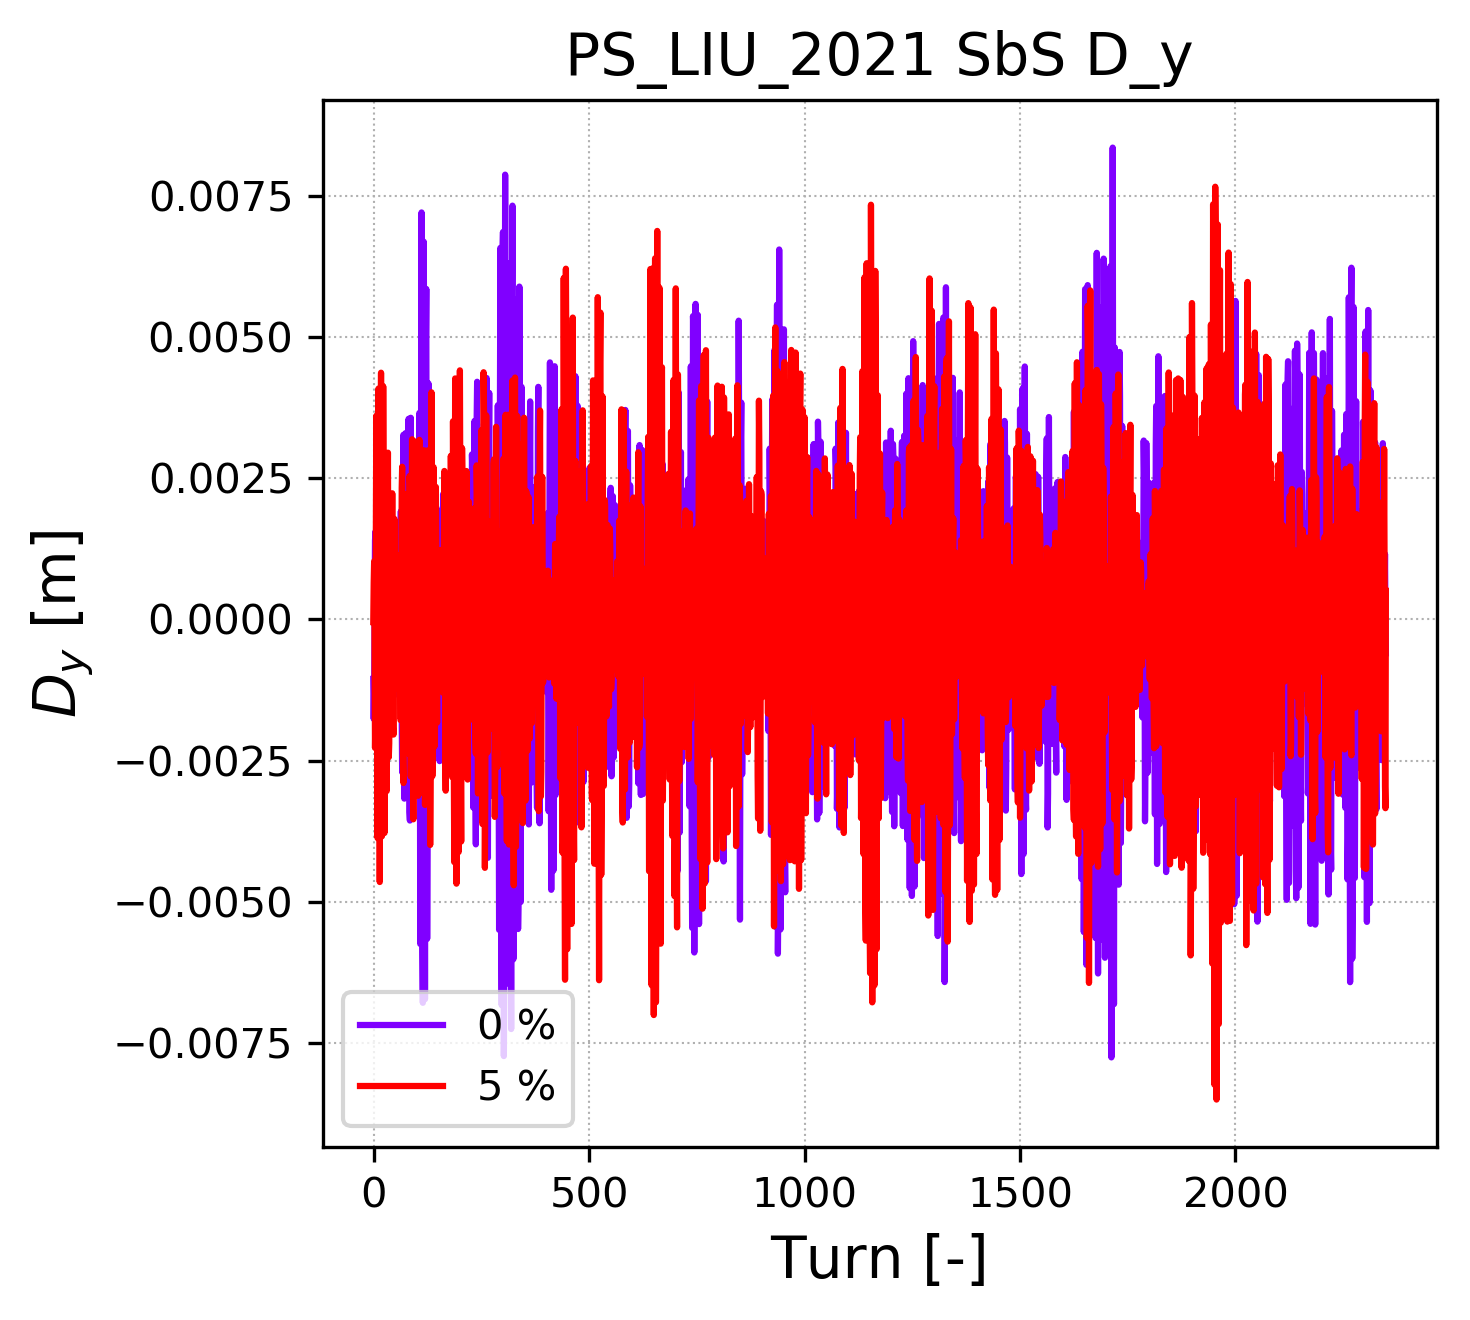

In [23]:
parameter = 'D_y'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [24]:
dd['2021 Standard']['epsn_y'][0][1199]

KeyError: '2021 Standard'

In [ ]:
ep_0_21 = (dd['2021 Standard']['epsn_x'][0][0] + dd['2021 Standard']['epsn_y'][0][0])/2
ep_f_21 = (dd['2021 Standard']['epsn_x'][0][999] + dd['2021 Standard']['epsn_y'][0][999])/2
print '2021: epsn_av_0 = ', ep_0_21
print '2021: epsn_av_1000 = ', ep_f_21
print '2021: average emttance growth in 1000 turns = ', round_sig(((ep_f_21/ep_0_21)*100-100),3), '%'

In [ ]:
ep_0_22 = (dd['2022 Standard']['epsn_x'][0][0] + dd['2022 Standard']['epsn_y'][0][0])/2
ep_f_22 = (dd['2022 Standard']['epsn_x'][0][999] + dd['2022 Standard']['epsn_y'][0][999])/2

print '2022: average emttance growth in 1000 turns = ', round_sig(((ep_f_22/ep_0_22)*100-100),3), '%'

In [ ]:
ep_0_23 = (dd['2023 Standard']['epsn_x'][0][0] + dd['2023 Standard']['epsn_y'][0][0])/2
ep_f_23 = (dd['2023 Standard']['epsn_x'][0][999] + dd['2023 Standard']['epsn_y'][0][999])/2

print '2023: average emttance growth in 1000 turns = ', round_sig(((ep_f_23/ep_0_23)*100-100),3), '%'